## Welcome to OpenVINO(TM) Toolkit Hands-on Lab Session 1

This lab contains; brief informative notes, OpenVINO(TM) Toolkit demos, available models and Model Optimizer samples to run inside Linux terminal & also some `python` code samples to understand how we can use Inference Engine API.

Jupyter notebook is a browser based IDE and allows partial code executions and text based inputs in markdown format at each cell.

Please follow the notations for each instruction in the following sections:

- If tutorial indicates you to run a certain command on terminal you will see the text as below and you should open a terminal or continue on the opened one as instructed. 

**Commands To Run on Terminal**
***
```bash
python3 
```
***

In Ubuntu, when you copy text, easiest way to paste code with keyboard is to press:

**SHIFT + INS** buttons

- If there are text looks like code; it is mainly the output of an example run of a sample code, please don't copy those back into terminal. 

**Example Terminal Output** 
***
``` output ```
***

- If you see python code inside the cell like below, take focus to cell by clicking to it then press:

**SHIFT + ENTER** 

or Click on `>| Run` run button above.

Below cell is a code block example, which you can run inside this browser and see the output directly below the cell. 

*You don't need to copy the code to terminal or any other IDE.* Just click on `Run` button or change focus to below cell and press `SHIFT + ENTER`

In [1]:
import numpy as np

arr1 = np.zeros(5)
print('Array 1 ', arr1)

arr2 = np.ones(5)
print('Array 2', arr2)

# Array Product 
print(arr1 * arr2)

Array 1  [0. 0. 0. 0. 0.]
Array 2 [1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0.]


# Agenda

Here is the topics covered in this Jupyter notebook. This notebook contains introductive information to give you the fundamental knowledge about OpenVINO(TM) Toolkit. 


## **Part 1** : Introduction to Intel(R) Distribution of OpenVINO(TM) Toolkit

A brief introduction about toolkits and software packages of OpenVINO(TM) Toolkit, where you can download and access to documentations. You may skip reading it.


## **Part 2** : OpenVINO(TM) Toolkit Demo Application

Running OpenVINO(TM) Toolkit demos, classification, object detection, image to text conversion models and understaing flow of OpenVINO(TM) Toolkit enabled application development and run flow.


## **Part 3** : Model Zoo and Model Downloader

This part will cover the Model Zoo, Intel(R) Pretrained Models and Model Downloader.


## **Part 4** : Model Optimizer 

This part covers the Model Optimizer, how to use it, what kind of optimizations are being used. 


## **Part 5** : Introduction to Inference Engine API 

This part includes a Python code sample to work with Inference Engine API for object detection.

**Notes**

- Output values are only samples, they can vary according to used hardware.
- *Other names and brands names, may be claimed as the property of others. 

# Part 1: What is Intel(R) Distribution of OpenVINO(TM) Toolkit?

Intel(R) Distribution of OpenVINO(TM) Toolkit, OpenVINO is short for Open Visual Inference and Neural Network Optimization, delivers a set of software packages, libraries and scripts to speed up computer vision and deep learning application development and deployment with existing and your custom deep learning models.

Intel(R) Distribution of OpenVINO(TM) Toolkit's main purpose is to speed-up inference, prediction process of Deep Learning models at all Intel(R) Hardware devices, CPU, GPU, VPU and FPGA computing devices.

Note that, Intel(R) Distribution of OpenVINO(TM) Toolkit do not help for training deep learning models, enhances only inference part, see https://software.intel.com & https://ai.intel.com sites for other tools intel offers for deep learning.

OpenVINO(TM) installation comes with following software tools and libraries. 

- OpenCV*
- OpenVX*
- Intel(R) Media SDK
- Model Downloader
- Model Optimizer
- Inference Engine API
 
Model Downloader, Model Optimizer & Inference Engine API are placed under Deep Learning Deployment Toolkit to help Deep Learning deployment.

## Quick Intro

This part has some brief information about Intel(R) Distribution of OpenVINO(TM) Toolkit to guide you through how to download, get source code and find documentations. 

All documents of Intel(R) Distribution of OpenVINO(TM) Toolkits has been moved to https://docs.openvinotoolkit.org after R1 2019 release, they are no more available offline.

Getting started URL helps you to install and start using OpenVINO(TM) toolkit on your own development environment. 

- https://docs.openvinotoolkit.org/latest/index.html

You can follow installation instructions for Linux, Windows & MacOS* separately. 

Intel(R) Distribution of OpenVINO(TM) Toolkit helps you to load deeplearning workload to different hardware devices `CPU, GPU, MYRIAD, FPGA` and run inference process on the requested target device.

All inference algorithms have been heavily optimized for each hardware platform with corresponding software libraries:

- CPU algorithms have been optimized using *Intel(R) Math Kernel Library - DNN* - [mkldnn](https://github.com/intel/mkl-dnn)

- GPU operations have been optimized using Intel's OpenCL Library. *openCL - DNN* - [OpenCL DNN](https://github.com/intel/clDNN)

- FPGA operations have been optimized with Intel(R) Deep Learning Acceleration Toolkit. 

During the installation process, do not skip the dependency installation parts, there are multiple dependencies which are not delivered with the installation, so follow the instructions for presquite installation and configuration steps provided in documentations.

In Linux distribution, OpenCL library, drivers, python packages and additional software libraries need to be installed to quickly start with OpenVINO(TM). Please do not skip the dependency installation parts when you get started. 

- https://docs.openvinotoolkit.org/latest/_docs_install_guides_installing_openvino_linux.html

Windows 10 installation process requires additional steps to be completed: Visual Studio Builder installation for CMake builds, paths need to be correctly set and so on.

- https://docs.openvinotoolkit.org/latest/_docs_install_guides_installing_openvino_windows.html

Intel(R) Distribution of OpenVINO(TM) Toolkit not only provides software development kits, but also add additional tools to download popular open source Deep Learning models and Intel's own deep learning models to fasten development and deployment of Deep Learning applications. 

- **Model Downloader** is being used to download popular Deep Learning models developed with Caffe*, Tensorflow*, MxNet*, ONNX* and Kaldi*. Intel models are downloaded during installation and can be easily used. In below sections we will see how they are being used.

An additional and required tool for OpenVINO(TM) Toolkit is Model Optimizer which helps you to convert and optimize your model to work with Inference Engine.

- **Model Optimizer** is being used to convert frozen models from Caffe*, Tensorflow*, MxNet*, ONNX* and Kaldi* to Intel(R) Distribution of OpenVINO(TM)'s IR files (.xml and .bin) to develop with them. Model Optimizer also provides couple more steps to additional configurations of the models. 

## Opensource OpenVINO Toolkit

OpenVINO(TM) is being integrated to OpenCV* project. Below URL is the main page for the open-source project. 

- https://01.org/openvinotoolkit 

Inference Engine and Model Optimizer are being maintained under DLDT project of OpenCV repository. 

- https://github.com/opencv/dldt 

Model Downloader and Intel Models are begin maintained under Open Model Zoo repository. Couple of populat Intel Model's (Plate Recognition) can be retrained using the scripts maintained here and also other frozen models can also be accesed from the below URL.

- https://github.com/opencv/open_model_zoo 

Finally, as a complementary for Open Model Zoo, training toolbox is also helpful to retrain couple of popular intel models, this is something under heavy development. 

- https://github.com/opencv/training_toolbox_tensorflow 

# Part 2: Intel(R) Distribution of OpenVINO(TM) Demos

In previous part & presentations, resources and some fundamental information about(R) Distribution of OpenVINO(TM) Toolkit has been pased.

In this part, we will run the demos delivered with the toolkit to make a quick start with Intel(R) Distribution of OpenVINO(TM) Toolkit. 

Demo applications of OpenVINO(TM) Toolkit, helps us to validate our installation for the platform. Demo scripts simply builds sample applications from source and run automatically. 

- OpenVINO(TM) Toolkit demo's has been placed under `/opt/intel/openvino/deployment_tools/demo` folder.

These demos are the start points of OpenVINO(TM) Toolkit, they initially checks for dependencies and build the samples.

`classification_sample` is the first sample for image classification using SquezeNet
`security_barrier_demo` is used to show how Intel(R) models are working. 

## Classification Demo

Follow the instructions below to run the image classification and security barrier demo. 

Demo script first downloads the squeezenet1.1 Caffe model and then converts it to IR Files. After model conversion is completed `classification_sample` binary loads the model files to run classification on the image shown below. 

As an output you will only see the classification predictions for the image. 

![Car](images/car.png) 


**NOTE**: Setting up environment variables is required when you work with shared libraries on your deployment environment, OpenVINO(TM) toolkit provides scripts for you to do that. If you start your OpenVINO(TM) Toolkit installation on your development environment you can use below command to setup environment variables for Linux, for Windows 10 you will find `setupvars.bat` file. It is already done for you on this setup so you can skip this part. 

***
```bash
source /opt/intel/openvino/bin/setupvars.sh
```
***
Output (Don't Copy to Terminal):
***

> ```bash [setupvars.sh] OpenVINO environment initialized ```
***

Let's proceed to run Classification demo.

### RUN THE COMMANDS BELOW TO RUN CLASSIFICATION DEMO

You can directly run single commands inside Jupyter Notebook Cells, they inherit the existing environment variables defined for this running Jupyter Notebook service and uses current directory where this Notebook located. 

Ok, let's see the command and run the below cell to execute demo script.

```
!echo <sudo pwd> | sudo -S /opt/intel/openvino/deployment_tools/demo/demo_squeezenet_download_convert_run.sh
```

After you run the following section command, it completes following tasks accordingly:

- Download and install missing dependencies and packages if required

- Script will compile the classification sample code to generate binary

- Script downloads classification deep learning model

- Converts downloaded DL Model to IR file to run with OpenVINO(TM) Toolkit Model Optimizer.

- Finally, classification example run with the given arguments.


Please carefully check the output of below command after you run to understand running principles.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [2]:
!echo intel123 | sudo -S /opt/intel/openvino/deployment_tools/demo/demo_squeezenet_download_convert_run.sh

[sudo] password for intel: sudo: /opt/intel/openvino/deployment_tools/demo/demo_squeezenet_download_convert_run.sh: command not found


#### Let's Run Script Tasks Manually to Understand OpenVINO(TM) Toolkit Working Principles

### 1. Let's See Available Models to Download

Following command will list all available models to download.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [3]:
!python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --print_all

python3: can't open file '/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py': [Errno 2] No such file or directory


## 2. Download squeezenet1.1 model for image classification. 

**Note** If there is no internet connection you can skip this step, model already downloaded on the lab PCs inside `/home/intel/openvino_models` folder.

Classification demo starts with downloading the `squeezenet1.1` Caffe model files, `.caffemodel` and `.prototxt`.

`.prototxt` file contains deep learning network topology and `.caffemodel` contains the weights and biases.

```bash
python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py \
--name squeezenet1.1 \
--output_dir /home/intel/openvino_models/
```

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [4]:
!python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py \
--name squeezenet1.1 \
--output_dir /home/intel/openvino_models/

python3: can't open file '/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py': [Errno 2] No such file or directory


Let's check if model downloaded correctly and files are in the destination folder.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [5]:
!ls /opt/intel/openvino/deployment_tools/tools/model_downloader/classification/squeezenet/1.1/caffe

ls: cannot access '/opt/intel/openvino/deployment_tools/tools/model_downloader/classification/squeezenet/1.1/caffe': No such file or directory


## 3. Convert Caffemodel to OpenVINO(TM) Toolkit Intermediate Representative Files

Inference Engine can't load the existing framework's frozen deep learning model files, they need to be converted to a common repsentative files called IR (Intermediate Representative) files by Model Optimizer.

Model Optimizer not only converts the model but also does certain optimization operations to ensure inference execution can be done faster with similar accuracy.

Classification demo, converts .caffemodel and .prototxt to .bin and .xml files to make them ready to be loaded by Inference Engine. 

```bash
python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
--input_model /home/intel/openvino_models/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel \
--output_dir /home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP32
```

We save converted models to `/home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP32` folder.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [6]:
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
--input_model /home/intel/openvino_models/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel \
--output_dir /home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP32

python3: can't open file '/opt/intel/openvino/deployment_tools/model_optimizer/mo.py': [Errno 2] No such file or directory


## 4. Run Classification with Converted Model and Image to get Classification Results

As you can see from previous commands, we first downloaded the classification demo, then converted it to IR files. Now, we can use this model with classification application to use for image classification. 

All sample applications are already built inside `/home/intel/inference_engine_samples_build/intel64/Release/` folder. Let's see the applications with below command.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [7]:
!ls /home/intel/inference_engine_samples_build/intel64/Release/

benchmark_app			 multi-channel-face-detection-demo
calibration_tool		 multi-channel-human-pose-estimation-demo
classification_sample		 object_detection_demo
classification_sample_async	 object_detection_demo_ssd_async
crossroad_camera_demo		 object_detection_demo_yolov3_async
end2end_video_analytics_ie	 object_detection_sample_ssd
end2end_video_analytics_opencv	 pedestrian_tracker_demo
hello_autoresize_classification  perfcheck
hello_classification		 security_barrier_camera_demo
hello_request_classification	 segmentation_demo
hello_shape_infer_ssd		 smart_classroom_demo
human_pose_estimation_demo	 speech_sample
interactive_face_detection_demo  style_transfer_sample
lenet_network_graph_builder	 super_resolution_demo
lib				 text_detection_demo
mask_rcnn_demo			 validation_app


With below command, we will run the `classification_sample` application with given model and car image.

- Car image is in `/opt/intel/openvino/deployment_tools/demo` folder.

- Model files are in `/home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP32` folder.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [8]:
!/home/intel/inference_engine_samples_build/intel64/Release/classification_sample \
-i /opt/intel/openvino/deployment_tools/demo/car.png \
-m /home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP32/squeezenet1.1.xml \
–d CPU

/home/intel/inference_engine_samples_build/intel64/Release/classification_sample: error while loading shared libraries: libinference_engine.so: cannot open shared object file: No such file or directory


Previous command used CPU for inference, below command uses GPU to run classification inference.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [9]:
!/home/intel/inference_engine_samples_build/intel64/Release/classification_sample \
-i /opt/intel/openvino/deployment_tools/demo/car.png \
-m /home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP32/squeezenet1.1.xml \
–d GPU

/home/intel/inference_engine_samples_build/intel64/Release/classification_sample: error while loading shared libraries: libinference_engine.so: cannot open shared object file: No such file or directory


With last command we used GPU for inference process and our model data type was FP32. Let's try to use FP16 with GPU. 

Let's convert to model to FP16 and save it to another folder with below command.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [10]:
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
--input_model /home/intel/openvino_models/classification/squeezenet/1.1/caffe/squeezenet1.1.caffemodel \
--output_dir /home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP16

python3: can't open file '/opt/intel/openvino/deployment_tools/model_optimizer/mo.py': [Errno 2] No such file or directory


Now, let's run the command with the FP16 models. 

**NOTE**: CPU can't use FP16 models, CPU only works with FP32 data type.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [11]:
!/home/intel/inference_engine_samples_build/intel64/Release/classification_sample \
-i /opt/intel/openvino/deployment_tools/demo/car.png \
-m /home/intel/openvino_models/classification/squeezenet/1.1/caffe/FP16/squeezenet1.1.xml \
–d GPU

/home/intel/inference_engine_samples_build/intel64/Release/classification_sample: error while loading shared libraries: libinference_engine.so: cannot open shared object file: No such file or directory


##  5. Security Barrier Demo

Previous section showed us basic steps to complete an inference with Intel(R) Distribution of OpenVINO(TM) Toolkit. There is a second demo which is named as `security_barrier_camera_demo`. 

This demo application uses models to detect car, plate and convert image to text. Demo opens a window so we need to run this demo on terminal.

- **Open a new Terminal Use `CTRL+ALT+T`***

Copy below command and paste to terminal (Quick info: Use `SHIFT+INSERT` keys to paste) to go to demo script directory.

***
```bash
cd /opt/intel/openvino/deployment_tools/demo
```
***

Run demo script and type sudo password if required (sudo pwd: intel123)

***
```bash
./demo_security_barrier_camera.sh
```
***

Execution Output:

![Sample Car](images/security_camera_demo.png)

## Part 3: Model Zoo & Model Downloader

Intel(R) Distribution of OpenVINO(TM) aims to reduce time on development and deployment process for Computer Vision & Deep Learning applications. Therefore, toolkit provides tools to easily download popular publicly available open source deep learning models & a set pre-trained models by Intel(R).

### Model Zoo

All models are maintained under the given repo:  

https://github.com/opencv/open_model_zoo

### Model Downloader

Model Downloader is a Python script stored under `/opt/intel/openvino/deployment_tools/tools/model_downloader` directory.

Below is the command to list all available models.

Use `-h` command to see all the options of downloader script.

## 1

List all available Deep Learning models, which can be downloaded. 

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [12]:
# Here is a list of available models to download with downloader.py script
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --print_all

python3: can't open file '/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py': [Errno 2] No such file or directory


Let's download a public object detection model built by Caffe framework called `MobileNet SSD`, we will use this model for following sessions as well. 

We will download all the public models and converted IR files to default `home/intel/openvino_models` folder. 

**Note**: If you don't have internet connection you can skip below part because it requires internet connection to download raw model, which is already available. 

## 2

Download MobileNet-SSD Object Detection Model with Below Command.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [13]:
# If there is no internet connection, you can get error, don't worry it is already downloaded.
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py \
--name mobilenet-ssd \
-o /home/intel/openvino_models

python3: can't open file '/opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py': [Errno 2] No such file or directory


### Reference Command for Downloading GoogleNet Model. 

**NOTE: This is just a for your reference, models already downloaded. You don't need to run the commands below**

***
```bash

python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name googlenet-v4 -o /home/intel/openvino_models

###############|| Downloading topologies ||###############

========= Downloading /home/intel/openvino_models/classification/googlenet/v4/caffe/googlenet-v4.prototxt
... 100%, 84 KB, 243 KB/s, 0 seconds passed

========= Downloading /home/intel/openvino_models/classification/googlenet/v4/caffe/googlenet-v4.caffemodel
... 100%, 166774 KB, 277 KB/s, 601 seconds passed


###############|| Post processing ||##############
```
***

### Reference Command for Downloading Alexnet 

**NOTE: This is just a for your reference, models already downloaded. You don't need to run the commands below**

***
```bash
python3 /opt/intel/openvino/deployment_tools/tools/model_downloader/downloader.py --name alexnet -o /home/intel/openvino_models

###############|| Downloading topologies ||###############

========= Downloading /home/intel/openvino_models/classification/alexnet/caffe/alexnet.prototxt
... 100%, 3 KB, 8086 KB/s, 0 seconds passed

========= Downloading /home/intel/openvino_models/classification/alexnet/caffe/alexnet.caffemodel
... 100%, 238146 KB, 280 KB/s, 847 seconds passed


###############|| Post processing ||###############

========= Changing input dimensions in alexnet.prototxt =========
```
***

## 3

List GoogleNet and AlexNet Model Files

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [14]:
# See that Alexnet and Googlenet is downloaded
# Press (SHIFT + Enter or Click on Run Button)
!ls /home/intel/openvino_models/classification/alexnet/caffe
!ls /home/intel/openvino_models/classification/googlenet/v4/caffe

alexnet.caffemodel  alexnet.prototxt
googlenet-v4.caffemodel  googlenet-v4.prototxt


## Part 4: Model Optimizer

Model Optimizer is a cross-platform command-line tool that facilitates the transition between the training and deployment environment, performs static model analysis, and adjusts deep learning models for optimal execution on end-point target devices.

Model Optimizer process assumes you have a network model trained using a supported deep learning framework. The scheme below illustrates the typical workflow for deploying a trained deep learning model:

![Model Optimizer](images/model_optimizer_schema.png)

Model Optimizer used to convert and optimize existing models to IR after certain static topological analysis of existing Caffe*, Tensorflow*, MxNet*, ONNX* and Kaldi* models and perform following optimizations on deep learning networks. 

- Batch Normalisation
- Mean Variance Normalisation
- Horizontal Fusion
- L2 Normalization Pattern
- Constant Folding
- Convolutional/Deconvolutional Grouping
- Linear Operation Fusion

Model Optimizer Developer Guide can be accessed from following URL: https://docs.openvinotoolkit.org/latest/_docs_MO_DG_Deep_Learning_Model_Optimizer_DevGuide.html 


Model Optimizer is a Python script to load Tensorflow*, Caffe*, MxNet*, Kaldi* & ONNX* framework models to convert them to OpenVINO(TM) Toolkit IR files.

Since all frameworks uses a different layer names and configurations, for each framework there are different Python scripts.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [15]:
!ls /opt/intel/openvino/deployment_tools/model_optimizer/

ls: cannot access '/opt/intel/openvino/deployment_tools/model_optimizer/': No such file or directory


As you can see from the output of previous command, each framework has its own Python script, however you can also use `mo.py` and determine the framework from command line or it detects it automatically to start conversion.

Let's see what kind of options we have with `mo.py` for conversion and optimization process.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [16]:
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py --help

python3: can't open file '/opt/intel/openvino/deployment_tools/model_optimizer/mo.py': [Errno 2] No such file or directory


### Understanding Commands and Optimization Operations

There are many options either specific to framework or model conversion, optimizations configurations. A few sample options for Model Optimizer arguments.

```
--data_type option helps to convert weights and biases to be converted to given floating point type. By default all parametes wil be in FP32 format.

here is a very detailed article by Intel(R) https://software.intel.com/en-us/articles/lower-numerical-precision-deep-learning-inference-and-training 
```

```
--disable_fusing      Turn off fusing of linear operations to Convolution. During optimization processes, certain operations are fused to dismiss unnecessary operations, so this can be canceled as well. 

```

Please refer to detailed article here for more information about Model Optimizer conversion: https://docs.openvinotoolkit.org/latest/_docs_MO_DG_prepare_model_convert_model_Converting_Model_General.html

We will now proceed to to convert previously downloaded `mobilenet-ssd` Caffe* model to OpenVINO(TM) Toolkit IR files, both for FP16 and FP32 data types.

- Please see following URL for detailed optimization steps used by Model Optimizer:

https://docs.openvinotoolkit.org/latest/_docs_MO_DG_prepare_model_Model_Optimization_Techniques.html

### Starting Convertion

Deep Learning training don't like heterogeneous inputs e.g. 120, 130, -22 , to train, so almost all the time input data is normalized between `[0.0 - 1.0]` to make deep learning model learn more efficiently, this is also valid for image inputs.

In many image procesing neural network, inputs are scaled down and RGB values are normalized with mean and scale values, so Model Optimizer should be aware of those values. 

If you trained your model you should know about the `scale`, if you are using someone else's network those values should be passed to you.

Normalization mainly is being done as following. `(IMAGE MATRIX - SUBSTRACT MEAN) / DIVIDE SCALE FACTOR`

So, for all the reasons of deep learning model training, `mobilenet-ssd` model scaled with 256 means divided by the largest value to get values between 1.0 and 0.0 so we will use

```--scale 256```

Mean values are determined as `127` so we will indicate that with `--mean_values` argument.

```--mean_values [127,127,127]```

Option explanations:

- `scale` means : `All input values coming from original network inputs will be divided by this value.`
- `mean_values` means: `Mean values to be used for the input image per channel. Values to be provided in the (R,G,B) or [R,G,B] format.`

### What happens if I dont' use normalization? 

Model Optimizer can't infer optimization steps so optimization would not be as expected.


### Do I need to Normalize input images while using Inference Engine?

Yes, you will normalize input images during the application run time when you loaded the input image. 

## 1

Let's Convert Caffe Model Files (MobileNet-SSD) to Intel(R) Distribution of OpenVINO(TM) IR Files (.xml , .bin) with data type FP32.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [17]:
# FP 32 Optimization and Convertion
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
--input_model "/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel" \
--output_dir /home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/FP32 --data_type FP32 --scale 256 --mean_values [127,127,127]

python3: can't open file '/opt/intel/openvino/deployment_tools/model_optimizer/mo.py': [Errno 2] No such file or directory


## 2

Convert Caffe Model Files (MobileNet-SSD) to Intel(R) Distribution of OpenVINO(TM) IR Files (.xml , .bin) with FP16 Data Type.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [18]:
# FP 16 Optimization and Convertion
# Press (SHIFT + Enter or Click on Run Button)
!python3 /opt/intel/openvino/deployment_tools/model_optimizer/mo.py \
--input_model "/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/caffe/mobilenet-ssd.caffemodel" \
--output_dir /home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/FP16 --data_type FP16 --scale 256 --mean_values [127,127,127]

python3: can't open file '/opt/intel/openvino/deployment_tools/model_optimizer/mo.py': [Errno 2] No such file or directory


### End Note

So, we have briefly seen how Model Optimizer to convert existing models trained with Caffe*, Tensorflow*, ONNX*, Kaldi* & MxNet*. Now, we can proceed to use converted model with OpenVINO(TM) Toolkit Inference Engine with Python.

# Part 5: Inference Engine Python API

At this part, we will make a brief introduction to Inference Engine Python API and see how you can implement inference with IE API. 

C++ API don't change much in logic, so when you get familiar with IE you could implement your own inference easily.

We will run each Python code snippet in this browser and see the results.

#### Python code blocks run inside the cells, in order to run below code, don't copy and paste it to terminal. Change focus to cell and press (SHIFT + ENTER) or click on Run button. 

#### If you don't see any output after the run of Python code, that means code successfully run inside the cell and you can skip to next cell and execute accordingly. 

## 1 . Import Required Python Libraries including OpenVINO(TM) Library

At this part we will import the libraries required for implementation and certain operations.

`cv2` is OpenCV* Library
`numpy` is used for vector and numerical operations
`matplotlib` is used for plotting operations.

In order to successfully import `openvino.inference_engine` environment variables should be set to set `PYTHONPATH`. 

Let's import libraries:

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [19]:
# Press (SHIFT + Enter or Click on Run Button)
# Required Libraries Imported
import sys
import os
import time
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Import Required OpenVINO(TM) Libraries
from openvino.inference_engine import IEPlugin, IENetwork

print('SUCCESS')

ImportError: No module named 'openvino'

Let's control the `PYTHONPATH` to see how we exported environment variables.Show Environment Variables

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [20]:
# Press (SHIFT + Enter or Click on Run Button)
# See that PYTHONPATH includes Intel CV Python path which includes OpenVINO Python Modules
!echo $PYTHONPATH

/opt/intel/openvino/python/python3.5:/opt/intel/openvino/deployment_tools/model_optimizer:/opt/intel/openvino/python/python3.5:/opt/intel/openvino/deployment_tools/model_optimizer


## 2. IEPlugin

First thing with Inference Engine is allocating memory and loading required library for the target device. 

Following method show us the steps to load Inference Engine target library which includes neural network layers and operations to run defined topolgy on the device.

The following cell constructs `IEPlugin` object, this is only the method, we will call this method in later section.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [21]:
def createPlugin(target_device, extension_list):
    # Plugin initialization for specified device. We will be targeting CPU initially.
    plugin = IEPlugin(device=target_device)

    # Loading additional kernel extension libraries for the CPU
    if target_device == 'CPU':
        for extension in extension_list:
            plugin.add_cpu_extension('/home/intel/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so')

    return plugin

print('SUCCESS')

SUCCESS


## 3. IENetwork

Second thing, we load defined Deep Learning Model with given plugin. Next method shows us how we load the neural network using IR files.

We will use this method in later sections.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [22]:
# Press (SHIFT + Enter or Click on Run Button)
def createNetwork(model_xml, model_bin, plugin):
    
    # Importing network weights from IR models.
    net = IENetwork(model=model_xml, weights=model_bin)

    # Some layers in IR models may be unsupported by some plugins so we check if there any unsupported layers
    if "CPU" in plugin.device:
        supported_layers = plugin.get_supported_layers(net)
        not_supported_layers = [l for l in net.layers.keys() if l not in supported_layers]
        if len(not_supported_layers) != 0:
            print("Following layers are not supported by the plugin for specified device {}:\n {}".
                      format(plugin.device, ', '.join(not_supported_layers)))
            return None
    return net

print('SUCCESS')

SUCCESS


## 4. ExecutableNetwork

When IEPlugin and IENetwork loaded, ExecutableNetwork object used to create inference requests on the network and target device. This is an intermediate access to IENetwork and target device. 

You will see `input_blob` and `output_blob` objects. Which defines the input shape and output shape of the networks and memory allocations for inputs and outputs.

`input_blob` shows us in what shape our inputs should be. 
`output_blob` determines the output of inference. 

We will use this method later to generate Executable Network to run inference.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [23]:
# Press (SHIFT + Enter or Click on Run Button)
def loadNetwork(plugin, net):
    # Loading IR model to the plugin.
    exec_net = plugin.load(network=net, num_requests=2)
    
    # Getting the input and outputs of the network
    input_blob = next(iter(net.inputs))
    
    out_blob = next(iter(net.outputs))
    
    return exec_net,input_blob,out_blob

print('SUCCESS')

SUCCESS


## 5. Input Pre-processing

In previous parts, we have created methods to provide required objects to run inference. However, we also need pre-processing of images, re-sizing the input image. 

Since, we already determined the normalisation during the model optimization, there only need a shape transformation of the input image. Below, method only helps us to do transformation and resize.

We will use this method to resize input images and allocate `input_blob` object to feed into `Executable Network` to get inference values.

In [24]:
# Press (SHIFT + Enter or Click on Run Button)
def preprocessImage(img_path, net, input_blob):
    # Reading the frame from a jpeg file
    frame = cv.imread(img_path)
    
    # Reshaping data
    n, c, h, w = net.inputs[input_blob].shape
    in_frame = cv.resize(frame, (w, h))
    in_frame = in_frame.transpose((2, 0, 1))  # Change data layout from HWC to CHW
    
    return in_frame.reshape((n, c, h, w)),frame

print('SUCCESS')

SUCCESS


Finally, lets import helper method to draw rectangles and write text to image.

Then, the labels of `mobilenet-ssd` model output results maps to given text values.

In [25]:
from utils.out_process import placeBoxes

labels_map = {0:'background',1: 'aeroplane', 2: 'bicycle', 3: 'bird', 4: 'boat', 5: 'bottle', 6: 'bus', 7: 'car', 8: 'cat',
              9: 'chair', 10: 'cow', 11: 'diningtable', 12: 'dog', 13: 'horse', 14: 'motorbike', 15: 'person', 16: 'pottedplant',
              17: 'sheep', 18: 'sofa', 19: 'train', 20: 'tvmonitor' }

## 6. Inference

Let's do the inference. 

Below, method helps us to define inference process from start to end. 

- Load IEPlugin, IENetwork, ExecutableNetwork with provided IR and Target.

- Pre-process Input Image

- Send image to ExecutableNetwork and call `Infer`

- Print the inferred image.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [26]:
def runInference(device='CPU', 
                 model_xml='/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/FP32/mobilenet-ssd.xml', 
                 model_bin='/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/FP32/mobilenet-ssd.bin',
                 image_file='images/car.png',
                 confidence_threshold=0.6):
    # Get Plugin
    plugin = createPlugin(target_device=device, extension_list=['/home/intel/inference_engine_samples_build/intel64/Release/lib/libcpu_extension.so'])
    
    # Get Network
    net = createNetwork(model_xml, model_bin, plugin)
    
    # Get Executable Network, Input and Output Layer Information
    exec_net,input_blob,out_blob = loadNetwork(plugin, net)
    
    # Pre-process Image According to Input Layer
    in_frame,original_frame = preprocessImage(image_file, net, input_blob)

    # Starting the inference in async mode, which starts the inference in parallel
    inference_start = time.time()
    
    # Start Infering given Frame/Image
    exec_net.infer(inputs={input_blob: in_frame})
    
    # Getting the result of the network
    res = exec_net.requests[0].outputs[out_blob]
    inference_end = time.time()
    # Processing the output result and adding labels on the image. Implementation is not shown in the
    #  this notebook; you can find it in object_detection_demo_ssd_async.py
    initial_w = original_frame.shape[1]
    initial_h = original_frame.shape[0]

    # Out Process/Draw Boxes
    frame = placeBoxes(res, labels_map, confidence_threshold, original_frame, initial_w, initial_h, False, 0, ((inference_end - inference_start)))
    # We use pyplot because it plays nicer with Jupyter Notebooks
    fig = plt.figure(dpi=300)
    ax = fig.add_subplot(111)
    ax.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB), interpolation='none')
    plt.axis("off")
    plt.show()
        
    return None

print('SUCCESS')

SUCCESS


Let's check out CPU information

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [27]:
# Press (SHIFT + Enter or Click on Run Button)
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 142
model name	: Intel(R) Core(TM) i5-7300U CPU @ 2.60GHz
stepping	: 9
microcode	: 0xb4
cpu MHz		: 2583.697
cache size	: 3072 KB
physical id	: 0
siblings	: 4
core id		: 0
cpu cores	: 2
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 22
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush dts acpi mmx fxsr sse sse2 ss ht tm pbe syscall nx pdpe1gb rdtscp lm constant_tsc art arch_perfmon pebs bts rep_good nopl xtopology nonstop_tsc cpuid aperfmperf tsc_known_freq pni pclmulqdq dtes64 monitor ds_cpl vmx smx est tm2 ssse3 sdbg fma cx16 xtpr pdcm pcid sse4_1 sse4_2 x2apic movbe popcnt tsc_deadline_timer aes xsave avx f16c rdrand lahf_lm abm 3dnowprefetch cpuid_fault epb invpcid_single pti ssbd ibrs ibpb stibp tpr_shadow vnmi flexpriority ept vpid fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm mpx rdseed adx smap clflushopt intel_pt xsaveopt xs

## 7. Inference with CPU

Since model folder and confidence default values defined, here we just want to run on CPU. You can change confidence threshold and try with different images to see the output.

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

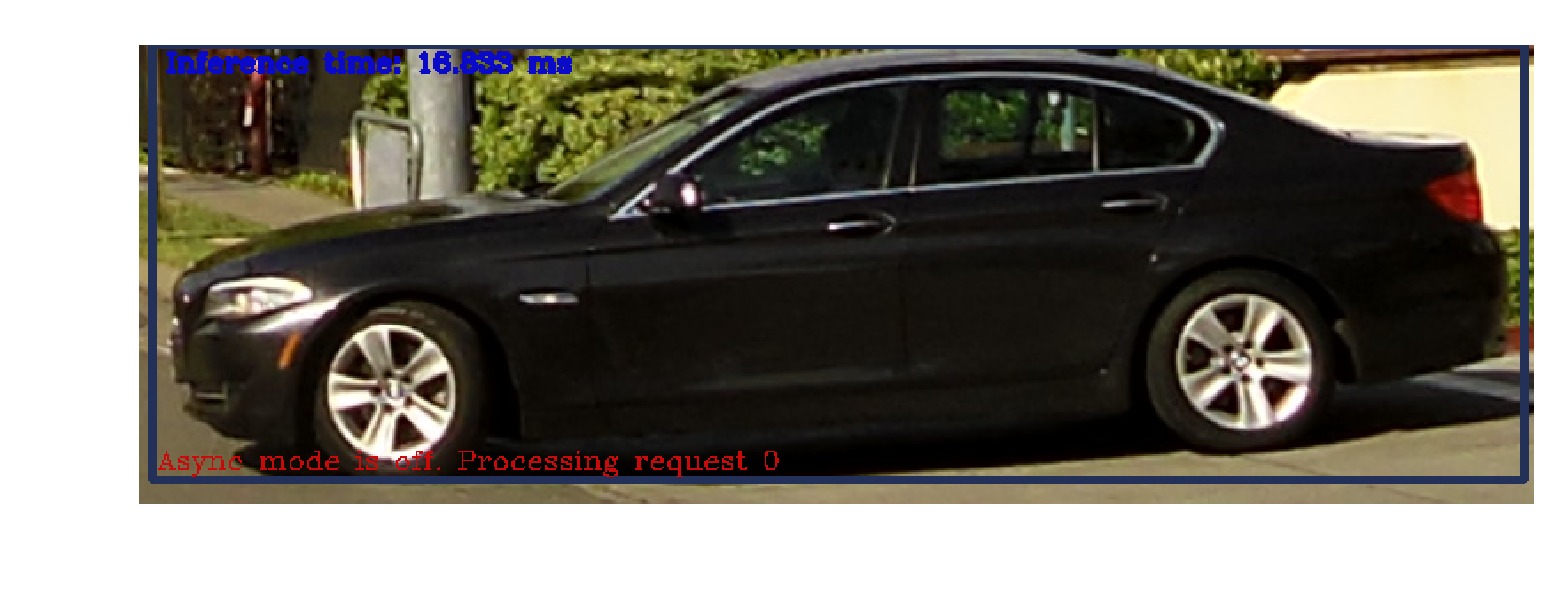

In [28]:
# CPU Inference
runInference('CPU')

In order to see the GPU on the system run the following command on terminal

```bash
lspci -nn -s 0:02.0
```

## 8. Inference with GPU

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

In [29]:
# Press (SHIFT + Enter or Click on Run Button)
!lspci -nn -s 0:02.0

00:02.0 VGA compatible controller [0300]: Intel Corporation HD Graphics 620 [8086:5916] (rev 02)


Run Inference on GPU with FP32 Converted Model

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

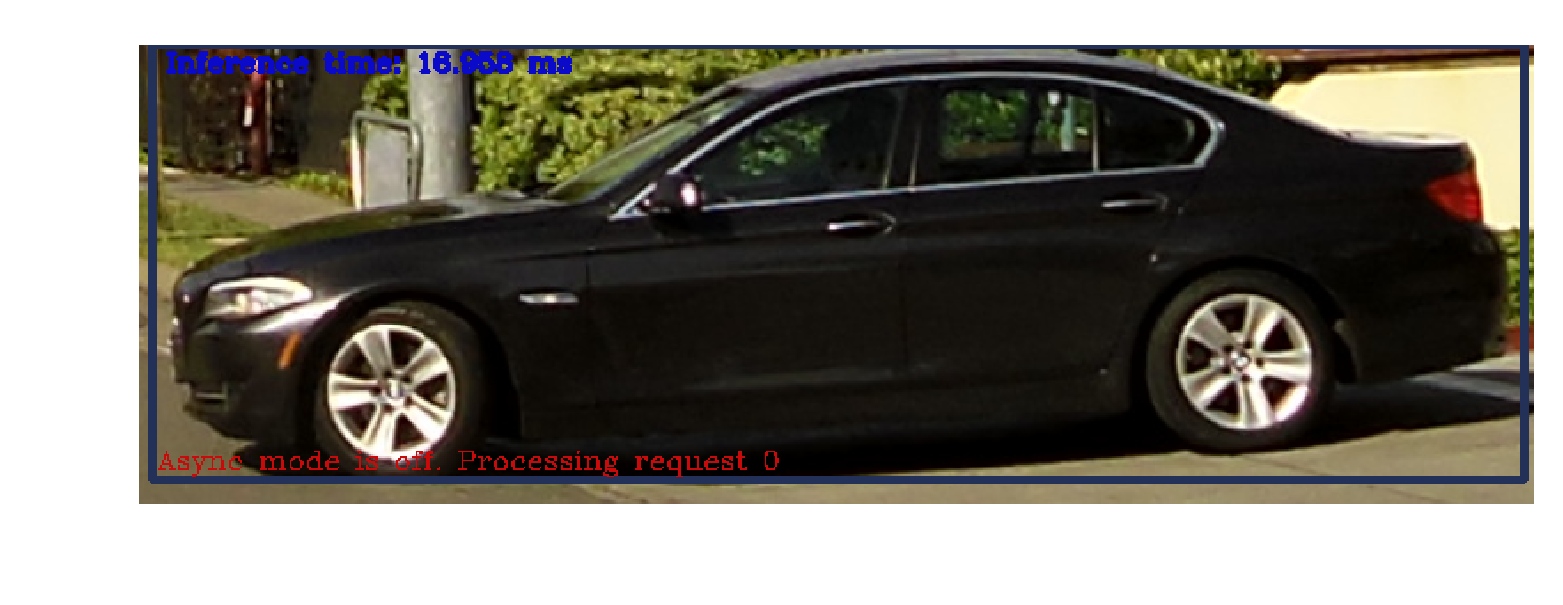

In [30]:
# Press (SHIFT + Enter or Click on Run Button)
runInference("GPU")

Run Inference on GPU with FP16 Converted Model

#### Change Focus to Below Cell and Press (SHIFT + ENTER) or Click on Run Button

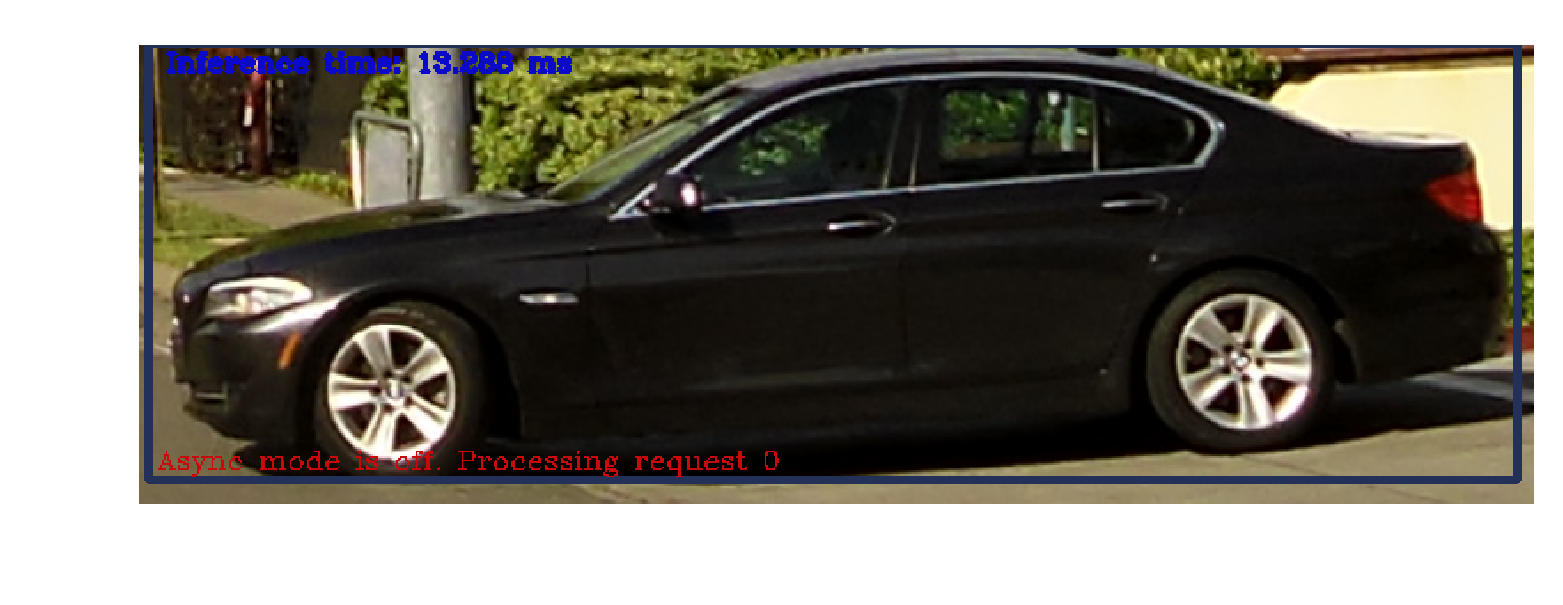

In [31]:
# Press (SHIFT + Enter or Click on Run Button)
runInference(device='GPU', 
             model_xml='/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/FP16/mobilenet-ssd.xml', 
             model_bin='/home/intel/openvino_models/models/object_detection/common/mobilenet-ssd/FP16/mobilenet-ssd.bin')

## End Note

Please feel free to try above code with different input images, confidence threshold or if you are comfortable with OpenCV and Python try to customize application.

# FOLLOW UP SESSION

## Security Barrier Follow Up

You can see the execution commands from the script outputs. You can change them and try to run with different images, target platroms etc. 

Below command will run `security_barrier_camera_demo` on GPU, we will also go over a similar example with multiple models and multiple targets. 

```bash
cd /home/intel/inference_engine_samples_build/intel64/Release/

./security_barrier_camera_demo -d GPU -d_va GPU -d_lpr GPU -i /opt/intel/openvino/deployment_tools/demo/car_1.bmp -m /home/intel/openvino_models/ir/FP32/Security/object_detection/barrier/0106/dldt/vehicle-license-plate-detection-barrier-0106.xml -m_va //home/intel/openvino_models/ir/FP32/Security/object_attributes/vehicle/resnet10_update_1/dldt/vehicle-attributes-recognition-barrier-0039.xml -m_lpr /home/intel/openvino_models/ir/FP32/Security/optical_character_recognition/license_plate/dldt/license-plate-recognition-barrier-0001.xml

[ INFO ] InferenceEngine: 
	API version ............ 1.4
	Build .................. 19154
[ INFO ] Parsing input parameters
[ INFO ] Capturing video streams from the video files or loading images
[ INFO ] Files were added: 1
[ INFO ]     /opt/intel/openvino/deployment_tools/demo/car_1.bmp
[ INFO ] Number of input image files: 1
[ INFO ] Number of input video files: 0
[ INFO ] Number of input channels:    1
[ INFO ] Loading plugin GPU

	API version ............ 1.5
	Build .................. 19154
	Description ....... clDNNPlugin
[ INFO ] Loading network files for VehicleDetection
[ INFO ] Batch size is forced to  1
[ INFO ] Checking Vehicle Detection inputs
[ INFO ] Checking Vehicle Detection outputs
[ INFO ] Loading Vehicle Detection model to the GPU plugin
[ INFO ] Loading network files for VehicleAttribs
[ INFO ] Batch size is forced to 1 for Vehicle Attribs
[ INFO ] Checking VehicleAttribs inputs
[ INFO ] Checking Vehicle Attribs outputs
[ INFO ] Loading Vehicle Attribs model to the GPU plugin
[ INFO ] Loading network files for Licence Plate Recognition (LPR)
[ INFO ] Batch size is forced to  1 for LPR Network
[ INFO ] Checking LPR Network inputs
[ INFO ] Checking LPR Network outputs
[ INFO ] Loading LPR model to the GPU plugin
[ INFO ] Start inference 

Avarage inference time: 27.3022 ms (36.6271 fps)

Total execution time: 11845.8
```

## Building All Samples

This is an extra stage, which is already done for you, but for future reference it is good to have all the commands.

Let's get into home directory.

***
```bash 
cd /home/intel
```
***

If `inference_engine_samples_build` folder exists, **remove** and remake it.

***
```bash
rm -rf /home/intel/inference_engine_samples_build && mkdir /home/intel/inference_engine_samples_build
```
***

***
```bash
cd /home/intel/inference_engine_samples_build
```
***

Then, we will recreate build files in this folder. 

***
```bash
source /opt/intel/openvino/bin/setupvars.sh
```
***

***
```bash
cmake /opt/intel/openvino/deployment_tools/inference_engine/samples/
```
***

***
```bash
make all -j8
```
***

After, successfull make all the sample applications will be ready to use in `/home/intel/inference_engine_samples/intel64/Release` folder.

***
```bash
ls /home/intel/inference_engine_samples_build/intel64/Release
```
***